In [1]:
# Copyright 2019 The Authors. All Rights Reserved.
#
# GNU General Public License v3.0
# Permissions of this strongest copyleft license are conditioned on 
# making available complete source code of licensed works and modifications, 
# which include larger works using a licensed work, under the same license. 
# Copyright and license notices must be preserved. 
# Contributors provide an express grant of patent rights. 
# When a modified version is used to provide a service over a network, 
# the complete source code of the modified version must be made available.
# ==============================================================================

# Title: Clustering of CRISPR spacers using Autoencoders
# Author: Hyunjin Shim
# Date created: 20190813
# Email: jinenstar@hotmail.com

# Clustering CRISPR spacers using Autoencoders

- to analyze CRISPR spacers/units from https://crispi.genouest.org/
- to cluster CRISPR spacers/units by type
- to perform dimensionality reduction to identify patterns
- to visualize the results after each experimentation
- to assess the best possible network architecture

# Dataset description
- Archaea: 15591 spacers
- Bacteria 67838 spacers

# Step 1: Load and preprocess raw data

In [2]:
# Data
import os
import pandas as pd
import numpy as np

# Biopython
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord

# Regular expression
import re

# Plot
from pylab import *
import pylab as pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
import matplotlib.patches as mpatches

# Tensorflow
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model
from keras import optimizers

# sklearn
from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [3]:
# location of raw data file
datapath = '/Users/jinenstar/Desktop/Data/CRISPR'
os.chdir(datapath)

# use Biopython to process and parse sequences
file_in ='archaea_spacer.txt'

with open(file_in) as fasta_file:  # Will close handle cleanly
    all_ID_ar_spacer = []
    all_sequence_ar_spacer = []
    all_length_ar_spacer = []
    for seq_record in SeqIO.parse(fasta_file, 'fasta'):  # (generator)
        # remove .id from .description record (remove all before first space)
        #seq_record.description=' '.join(seq_record.description.split()[1:])
        # a list of IDs and sequences
        all_ID_ar_spacer.append(seq_record.id)
        all_sequence_ar_spacer.append(seq_record.seq)
        all_length_ar_spacer.append(len(seq_record.seq))

# find maximum seq length
max_length_ar_spacer = max(all_length_ar_spacer)
min_length_ar_spacer = min(all_length_ar_spacer)

In [4]:
print(seq_record)

ID: ref|NC_014537|
Name: ref|NC_014537|
Description: ref|NC_014537|  Vulcanisaeta distributa DSM 14429 chromosome 1601737-1601789
Number of features: 0
Seq('GCCGGCCCAGACTCATGTTACTGCAAACTCGAGGGGATTGGGTGCACGCAGAT', SingleLetterAlphabet())


In [5]:
print(min_length_ar_spacer)
print(all_length_ar_spacer.index(min_length_ar_spacer))
#all_ID[all_length_ar_spacer.index(min_length_ar_spacer)]

4
11232


In [6]:
print(max_length_ar_spacer)
print(all_length_ar_spacer.index(max_length_ar_spacer))
#all_ID_ar_spacer[all_length_ar_spacer.index(max_length_ar_spacer)]

488
5094


In [7]:
all_ID_ar_spacer[-10:]

['ref|NC_014537|',
 'ref|NC_014537|',
 'ref|NC_014537|',
 'ref|NC_014537|',
 'ref|NC_014537|',
 'ref|NC_014537|',
 'ref|NC_014537|',
 'ref|NC_014537|',
 'ref|NC_014537|',
 'ref|NC_014537|']

In [8]:
all_sequence_ar_spacer[-10:]

[Seq('TAAAGCAGTCTATCAAGCATTCCGTGATTTCCTTAAGGAAAG', SingleLetterAlphabet()),
 Seq('AAAGATGGTGCCAGTATTGCCAGGCAATGAAATTCATGATGGTTT', SingleLetterAlphabet()),
 Seq('AATACAATAATAAGAGTCCCTGCGGACCCTAACGGTAAGCCGACAG', SingleLetterAlphabet()),
 Seq('TACTGTGAATGCGTTGAATGTCAACACAGCTACTTACCAGCAAA', SingleLetterAlphabet()),
 Seq('TCAGTAGTCATTATGATGTACTGCCAGACGGCCATTCCCCTATTGT', SingleLetterAlphabet()),
 Seq('GTGTCTAAAAATGACGATGCATGTGAGTGGTTTAAGGCGTGGTTGACA', SingleLetterAlphabet()),
 Seq('TCGTTAAAAGATACGGGGCAGGAAATAATGACATTTGAAGAGGGATTA', SingleLetterAlphabet()),
 Seq('ATTCCTAATCACCTACACCTCAAATTCGCAGGTAATGGAATAACTTCG', SingleLetterAlphabet()),
 Seq('AAAAACTTATAAATCAGTCCTGAGCAAAAACAATGTATGAAAGAAA', SingleLetterAlphabet()),
 Seq('GCCGGCCCAGACTCATGTTACTGCAAACTCGAGGGGATTGGGTGCACGCAGAT', SingleLetterAlphabet())]

In [9]:
# location of raw data file
datapath = '/Users/jinenstar/Desktop/Data/CRISPR'
os.chdir(datapath)

# use Biopython to process and parse sequences
file_in ='bacteria_spacer.txt'

with open(file_in) as fasta_file:  # Will close handle cleanly
    all_ID_ba_spacer = []
    all_sequence_ba_spacer = []
    all_length_ba_spacer = []
    for seq_record in SeqIO.parse(fasta_file, 'fasta'):  # (generator)
        # remove .id from .description record (remove all before first space)
        #seq_record.description=' '.join(seq_record.description.split()[1:])
        # a list of IDs and sequences
        all_ID_ba_spacer.append(seq_record.id)
        all_sequence_ba_spacer.append(seq_record.seq)
        all_length_ba_spacer.append(len(seq_record.seq))

# find maximum seq length
max_length_ba_spacer = max(all_length_ba_spacer)
min_length_ba_spacer = min(all_length_ba_spacer)

In [10]:
print(seq_record)

ID: ref|NC_022900|
Name: ref|NC_022900|
Description: ref|NC_022900|  Zymomonas mobilis subsp. mobilis str. CP4 = NRRL B-14023 1794820-1794851
Number of features: 0
Seq('GCCAATTTTTCAGCATAACGTCGCAGCTCAAC', SingleLetterAlphabet())


In [11]:
print(min_length_ba_spacer)
print(all_length_ba_spacer.index(min_length_ba_spacer))
#all_ID_ba_spacer[all_length_ba_spacer.index(min_length_ba_spacer)]

2
47107


In [12]:
print(max_length_ba_spacer)
print(all_length_ba_spacer.index(max_length_ba_spacer))
#all_ID_ba_spacer[all_length_ba_spacer.index(max_length_ba_spacer)]

946
65581


In [13]:
all_ID_ba_spacer[-10:]

['ref|NC_022900|',
 'ref|NC_022900|',
 'ref|NC_022900|',
 'ref|NC_022900|',
 'ref|NC_022900|',
 'ref|NC_022900|',
 'ref|NC_022900|',
 'ref|NC_022900|',
 'ref|NC_022900|',
 'ref|NC_022900|']

In [14]:
all_sequence_ba_spacer[-10:]

[Seq('CGACCGTTACGATCAACGATATCGGCGCGCGCCTGCAACGGCGCAACGGGTGGA...GTG', SingleLetterAlphabet()),
 Seq('GAAGGATTTTTGCCCGGGACAAAAT', SingleLetterAlphabet()),
 Seq('CAGCTTTGCGCTTTAGCGTTGCGG', SingleLetterAlphabet()),
 Seq('CTCCAAGAAGAGATCGCAACCGAG', SingleLetterAlphabet()),
 Seq('AAAAGACACGATATGCGATGTGGC', SingleLetterAlphabet()),
 Seq('GCGTGTCTTCGATAATAACTCTGCGACGATC', SingleLetterAlphabet()),
 Seq('CGACAGTCGGGCCGGATACCATGATCCGAGT', SingleLetterAlphabet()),
 Seq('AAGGTAATATTATCGTCACTGACAAGCAAGG', SingleLetterAlphabet()),
 Seq('TCTTGTGACATTGCTGGCTTTGCTTGAGCAT', SingleLetterAlphabet()),
 Seq('GCCAATTTTTCAGCATAACGTCGCAGCTCAAC', SingleLetterAlphabet())]

In [15]:
# genetic sequence into numerical values: replace('A','1').replace('C','2').replace('G','3').replace('T','4').replace('N','0').replace('n','0')
all_sequence_no_ar_spacer = []
for i in range(len(all_sequence_ar_spacer)):
    all_sequence_no_ar_spacer.append(str(all_sequence_ar_spacer[i]).replace('T','1').replace('A','2').replace('G','3').replace('C','4').replace('t','1').replace('a','2').replace('g','3').replace('c','4').replace('N','0').replace('n','0').replace('K','0').replace('Y','0').replace('M','0').replace('R','0').replace('W','0').replace('S','0').replace('H','0').replace('B','0').replace('k','0').replace('y','0').replace('m','0').replace('r','0').replace('w','0').replace('s','0').replace('b','0').replace('h','0'))

In [16]:
# genetic sequence into numerical values: replace('A','1').replace('C','2').replace('G','3').replace('T','4').replace('N','0').replace('n','0')
all_sequence_no_ba_spacer = []
for i in range(len(all_sequence_ba_spacer)):
    all_sequence_no_ba_spacer.append(str(all_sequence_ba_spacer[i]).replace('T','1').replace('A','2').replace('G','3').replace('C','4').replace('t','1').replace('a','2').replace('g','3').replace('c','4').replace('N','0').replace('n','0').replace('K','0').replace('Y','0').replace('M','0').replace('R','0').replace('W','0').replace('S','0').replace('B','0').replace('H','0').replace('k','0').replace('y','0').replace('m','0').replace('r','0').replace('w','0').replace('s','0').replace('b','0').replace('h','0'))

In [17]:
all_sequence_no = all_sequence_no_ar_spacer + all_sequence_no_ba_spacer

In [18]:
# dictionary to DataFrame
all_ID = all_ID_ar_spacer + all_ID_ba_spacer
all_length = all_length_ar_spacer + all_length_ba_spacer

all_label_ar_spacer = [0] * len(all_sequence_ar_spacer)
all_label_ba_spacer = [1] * len(all_sequence_ba_spacer)
all_label = all_label_ar_spacer + all_label_ba_spacer

all_keyword_ar_spacer = ['Archaea'] * len(all_sequence_ar_spacer)
all_keyword_ba_spacer = ['Bacteria'] * len(all_sequence_ba_spacer)
all_keyword = all_keyword_ar_spacer + all_keyword_ba_spacer

d = {'ID':all_ID, 'Category':all_keyword, 'Label':all_label, 'Length':all_length}
all_data = pd.DataFrame(d)

In [19]:
all_data

,ID,Category,Label,Length
0,ref|NC_015518|,Archaea,0,33
1,ref|NC_015518|,Archaea,0,35
2,ref|NC_015518|,Archaea,0,35
3,ref|NC_015518|,Archaea,0,34
4,ref|NC_015518|,Archaea,0,36
5,ref|NC_015518|,Archaea,0,34
6,ref|NC_015518|,Archaea,0,34
7,ref|NC_015518|,Archaea,0,35
8,ref|NC_015518|,Archaea,0,34
9,ref|NC_015518|,Archaea,0,34


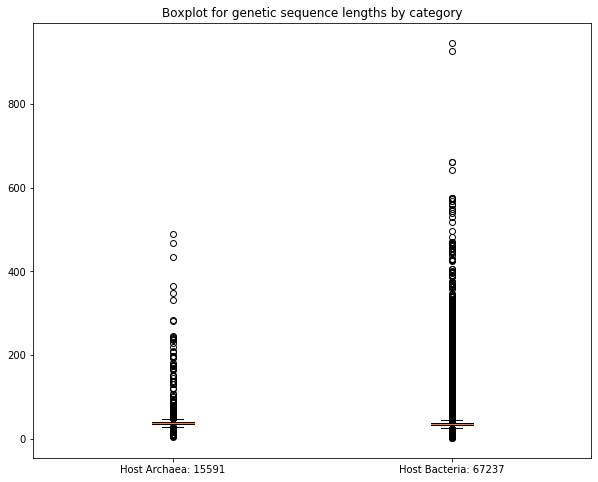

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

data_archaea = all_data[all_data['Label']==0]
len_archaea = len(data_archaea)
data_bacteria = all_data[all_data['Label']==1]
len_bacteria = len(data_bacteria)

# boxplot
data_plot = [data_archaea['Length'],data_bacteria['Length']]
fig1, ax1 = plt.subplots(figsize=(10,8))
ax1.set_title('Boxplot for genetic sequence lengths by category')
ax1.boxplot(data_plot)
plt.xticks([1,2],['Host Archaea: '+str(len_archaea),'Host Bacteria: '+str(len_bacteria)])
plt.show()

In [21]:
# numpy array of sequences of a fixed length

median_length = 500
# define numpy array with dimension (1,227,759 proteins, median=500 features)
all_sequence_no_dim = np.zeros(shape=(len(all_sequence_no),median_length))
# define dimension of features
no_dim_features = median_length

print(all_sequence_no_dim.shape)

for n in range(len(all_sequence_no)):
    # convert char sequence to digit sequence
    sequence_digits=[int(d) for d in str(all_sequence_no[n])]
    # store digit sequence into numpy with right dimension
    if len(sequence_digits) <= median_length:
        all_sequence_no_dim[n,0:len(sequence_digits)]=sequence_digits[0:len(sequence_digits)]
    else:
        all_sequence_no_dim[n]=sequence_digits[0:median_length]   

(82828, 500)


In [22]:
# print(all_sequence[0])
# print(all_sequence_no[0])
# print(len(all_sequence_no_dim[0]))
# print(all_sequence_no_dim[0])

In [23]:
def reproduce(seed_number):
    import tensorflow as tf
    import random
    os.environ['PYTHONHASHSEED'] = '0'
    np.random.seed(seed_number)
    random.seed(seed_number)
    session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
    #from keras import backend as K
    tf.set_random_seed(seed_number)
    sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
    #K.set_session(sess)
    tf.keras.backend.set_session(sess)

In [24]:
from sklearn.preprocessing import MinMaxScaler
#scale data 0-1
min_max_scaler = MinMaxScaler( feature_range=(0,1), copy=True )
all_sequence_no_dim_norm = min_max_scaler.fit_transform(all_sequence_no_dim)

In [25]:
# what type of gene subpopulations exist in data? Let's do PCA
from sklearn.decomposition import PCA

# PCA
pca = PCA(n_components=2)
Y = pca.fit_transform(all_sequence_no_dim_norm)
#Y = pca.fit_transform(all_sequence_no_dim)

# 3D PCA
pca_3D = PCA(n_components=3)
Y_3D = pca.fit_transform(all_sequence_no_dim_norm)

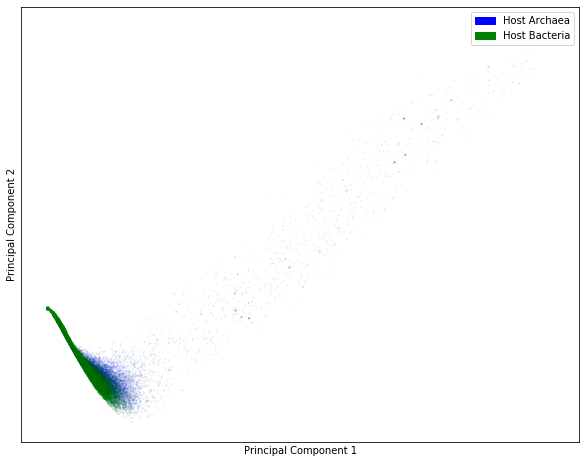

In [26]:
#label_name = {1:"Host Archaea", 2:"Host Bacteria"}
label_color_map = {0:'blue',1:'green'}
label_color = [label_color_map[c] for c in all_label]

# 2D PCA plot
fig = plt.figure(figsize=(10,8))
ax = plt.scatter(Y[:,0], Y[:,1], s=1, c=label_color, alpha=0.05)

plt.xticks([])
plt.yticks([])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
virus_patch = mpatches.Patch(color='blue', label='Host Archaea')
phage_patch = mpatches.Patch(color='green', label='Host Bacteria')
plt.legend(handles=[virus_patch,phage_patch],loc='upper right')

plt.show()
#fig.savefig('PCA_min_features_acr_2D.pdf')

# Step 2: Create, compile, fit autoencoder model
- use Keras, a high-level neural networks API that runs on top of librares like TensorFlow.

In [27]:
#split the data in training and test sets
Y = pd.Series(all_label)

x_train, x_test, y_train_og, y_test = train_test_split(all_sequence_no_dim_norm, Y, test_size=0.01, random_state=10)
print('Training set has', x_train.shape[0], 'rows and', x_train.shape[1], 'columns')
print('Test set has', x_test.shape[0], 'rows and', x_test.shape[1], 'columns')

Training set has 81999 rows and 500 columns
Test set has 829 rows and 500 columns


In [28]:
y_train = pd.Series(y_train_og).values

In [29]:
#plot original data, reconstructed data, residuals
def plot_reconstruction(data_norm, data_dec):
    plt.figure(figsize=(30,20))
    plt.subplot(3,1,1)
    ax1 = plt.imshow(data_norm, cmap="seismic", aspect="auto", vmin=0, vmax=1)
    cbar = plt.colorbar(ax1)
    plt.title('Original data', fontsize=25)
    plt.subplot(3,1,2)
    ax2 = plt.imshow(data_dec, cmap="seismic", aspect="auto", vmin=0, vmax=1)
    cbar = plt.colorbar(ax2)
    plt.title('Recondstruction', fontsize=25)
    plt.subplot(3,1,3)
    ax3 = plt.imshow(data_norm-data_dec, cmap="seismic", aspect="auto", vmin=-1, vmax=1)
    plt.gca().set_xticks(range(no_dim_features))
#    plt.gca().set_xticklabels(markers, fontsize=20)
    cbar = plt.colorbar(ax3)
    plt.title('Residuals', fontsize=25)
    plt.show()
    # print residual values
    print(sum(abs(data_norm-data_dec)))
    
#plot training history
def plot_history(autoencoder):
    fig = plt.figure(figsize=(6,4))
    plt.plot(autoencoder.history.history['loss'])
    plt.plot(autoencoder.history.history['val_loss'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss function')
    plt.legend(['Loss', 'Validation loss'])
    plt.show()

#plot reduced dimensions
def plot_encoded(x_train_encoded, y_train): 
    #label_name = {1:"Host Archaea", 2:"Host Bacteria"}
    label_color_map = {0:'blue',1:'green'}
    label_color = [label_color_map[c] for c in y_train]

    virus_patch = mpatches.Patch(color='blue', label='Host Archaea')
    phage_patch = mpatches.Patch(color='green', label='Host Bacteria')

    fig = plt.figure(figsize=(10,8))
    ax = plt.scatter(x_train_encoded[:,0], x_train_encoded[:,1], s=5, c=label_color, alpha=0.05)
    #cbar = plt.colorbar(ax, ticks=range(21))
    #cbar.ax.set_yticklabels(cell_types['cell type name'])
    #ax.set_facecolor('white')

    plt.legend(handles=[virus_patch,phage_patch],loc='upper right')

    plt.xticks([])
    plt.yticks([])
    plt.xlabel('Latent Dimension 1')
    plt.ylabel('Latent Dimension 2')
    plt.show()

def plot_encoded_3D(x_train_encoded, y_train):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111, projection='3d')

    label_color_map = {0:'blue',1:'green'}
    label_color = [label_color_map[c] for c in y_train]
    
    ax.scatter(x_train_encoded[:,0], \
               x_train_encoded[:,1], \
               x_train_encoded[:,2], \
               c=label_color, alpha=0.1)

    ax.set_xlabel('Dim 1')
    ax.set_ylabel('Dim 2')
    ax.set_zlabel('Dim 3')
    
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    pylab.title("3D Embedding: ")
    pylab.show()
    return

In [42]:
reproduce(10)

#set dimensions of input and hidden layer
input_dim = no_dim_features
intermediate_1 = 300
intermediate_2 = 100
intermediate_3 = 30
intermediate_4 = 10
latent_dim = 3

input_data = tf.keras.layers.Input(shape=(input_dim,))
#encode the input with a dense layer
encoded_1 = tf.keras.layers.Dense(intermediate_1, activation='relu')(input_data)
encoded_2 = tf.keras.layers.Dense(intermediate_2, activation='relu')(encoded_1)
encoded_3 = tf.keras.layers.Dense(intermediate_3, activation='relu')(encoded_2)
encoded_4 = tf.keras.layers.Dense(intermediate_4, activation='relu')(encoded_3)
encoded_5 = tf.keras.layers.Dense(latent_dim, activation='relu')(encoded_4)
#decode the encoded input to its reconstruction
decoded_1 = tf.keras.layers.Dense(intermediate_4, activation='relu')(encoded_5)
decoded_2 = tf.keras.layers.Dense(intermediate_3, activation='relu')(decoded_1)
decoded_3 = tf.keras.layers.Dense(intermediate_2, activation='relu')(decoded_2)
decoded_4 = tf.keras.layers.Dense(intermediate_1, activation='relu')(decoded_3)
decoded_5 = tf.keras.layers.Dense(input_dim, activation='sigmoid')(decoded_4)

#autoencoder_2 maps the input to the output
autoencoder_5 = tf.keras.models.Model(input_data, decoded_5)

#encoder_2 maps the input to the latent representation
encoder_5 = tf.keras.models.Model(input_data, encoded_5)

#compile the model and set the desired optimizer and loss function
adam = tf.keras.optimizers.Adam(lr=0.00000001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
autoencoder_5.compile(optimizer=adam, loss='mean_squared_error')
autoencoder_5.summary()
autoencoder_5.fit(x_train, x_train,
                epochs=10000,
                batch_size=256,
                shuffle=False,
                validation_data=(x_test, x_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 500)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 300)               150300    
_________________________________________________________________
dense_21 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_22 (Dense)             (None, 30)                3030      
_________________________________________________________________
dense_23 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_24 (Dense)             (None, 3)                 33        
_________________________________________________________________
dense_25 (Dense)             (None, 10)                40        
__________

81999/81999 [==============================] - 6s 74us/sample - loss: 0.2382 - val_loss: 0.2384
Epoch 59/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2382 - val_loss: 0.2384
Epoch 60/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.2382 - val_loss: 0.2384
Epoch 61/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.2382 - val_loss: 0.2384
Epoch 62/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2382 - val_loss: 0.2384
Epoch 63/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2382 - val_loss: 0.2384
Epoch 64/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.2382 - val_loss: 0.2384
Epoch 65/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2382 - val_loss: 0.2384
Epoch 66/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2382 - val_loss: 0.2383
Epoch 67/10000
8

81999/81999 [==============================] - 6s 74us/sample - loss: 0.2381 - val_loss: 0.2383
Epoch 132/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2381 - val_loss: 0.2383
Epoch 133/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2381 - val_loss: 0.2383
Epoch 134/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2381 - val_loss: 0.2382
Epoch 135/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2381 - val_loss: 0.2382
Epoch 136/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2381 - val_loss: 0.2382
Epoch 137/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2381 - val_loss: 0.2382
Epoch 138/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2381 - val_loss: 0.2382
Epoch 139/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2380 - val_loss: 0.2382
Epoch 14

81999/81999 [==============================] - 6s 76us/sample - loss: 0.2379 - val_loss: 0.2381
Epoch 205/10000
81999/81999 [==============================] - 6s 77us/sample - loss: 0.2379 - val_loss: 0.2381
Epoch 206/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.2379 - val_loss: 0.2381
Epoch 207/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.2379 - val_loss: 0.2381
Epoch 208/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.2379 - val_loss: 0.2381
Epoch 209/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.2379 - val_loss: 0.2381
Epoch 210/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.2379 - val_loss: 0.2381
Epoch 211/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.2379 - val_loss: 0.2381
Epoch 212/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.2379 - val_loss: 0.2381
Epoch 21

81999/81999 [==============================] - 6s 75us/sample - loss: 0.2378 - val_loss: 0.2379
Epoch 278/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2378 - val_loss: 0.2379
Epoch 279/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2377 - val_loss: 0.2379
Epoch 280/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2377 - val_loss: 0.2379
Epoch 281/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2377 - val_loss: 0.2379
Epoch 282/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2377 - val_loss: 0.2379
Epoch 283/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2377 - val_loss: 0.2379
Epoch 284/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2377 - val_loss: 0.2379
Epoch 285/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2377 - val_loss: 0.2379
Epoch 28

81999/81999 [==============================] - 6s 75us/sample - loss: 0.2376 - val_loss: 0.2377
Epoch 351/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2376 - val_loss: 0.2377
Epoch 352/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2375 - val_loss: 0.2377
Epoch 353/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2375 - val_loss: 0.2377
Epoch 354/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2375 - val_loss: 0.2377
Epoch 355/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2375 - val_loss: 0.2377
Epoch 356/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2375 - val_loss: 0.2377
Epoch 357/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2375 - val_loss: 0.2377
Epoch 358/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.2375 - val_loss: 0.2377
Epoch 35

81999/81999 [==============================] - 6s 75us/sample - loss: 0.2373 - val_loss: 0.2375
Epoch 424/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2373 - val_loss: 0.2375
Epoch 425/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2373 - val_loss: 0.2375
Epoch 426/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2373 - val_loss: 0.2375
Epoch 427/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2373 - val_loss: 0.2375
Epoch 428/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2373 - val_loss: 0.2375
Epoch 429/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2373 - val_loss: 0.2375
Epoch 430/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2373 - val_loss: 0.2375
Epoch 431/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2373 - val_loss: 0.2375
Epoch 43

81999/81999 [==============================] - 6s 76us/sample - loss: 0.2370 - val_loss: 0.2372
Epoch 497/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.2370 - val_loss: 0.2372
Epoch 498/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2370 - val_loss: 0.2372
Epoch 499/10000
81999/81999 [==============================] - 6s 77us/sample - loss: 0.2370 - val_loss: 0.2372
Epoch 500/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.2370 - val_loss: 0.2372
Epoch 501/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.2370 - val_loss: 0.2372
Epoch 502/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.2370 - val_loss: 0.2372
Epoch 503/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.2370 - val_loss: 0.2372
Epoch 504/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2370 - val_loss: 0.2372
Epoch 50

81999/81999 [==============================] - 6s 75us/sample - loss: 0.2367 - val_loss: 0.2369
Epoch 570/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2367 - val_loss: 0.2369
Epoch 571/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2367 - val_loss: 0.2369
Epoch 572/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2367 - val_loss: 0.2369
Epoch 573/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2367 - val_loss: 0.2369
Epoch 574/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2367 - val_loss: 0.2369
Epoch 575/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2367 - val_loss: 0.2369
Epoch 576/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2367 - val_loss: 0.2369
Epoch 577/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2367 - val_loss: 0.2369
Epoch 57

81999/81999 [==============================] - 6s 75us/sample - loss: 0.2364 - val_loss: 0.2366
Epoch 643/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2364 - val_loss: 0.2366
Epoch 644/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2364 - val_loss: 0.2366
Epoch 645/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.2364 - val_loss: 0.2366
Epoch 646/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2364 - val_loss: 0.2366
Epoch 647/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2364 - val_loss: 0.2366
Epoch 648/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2364 - val_loss: 0.2366
Epoch 649/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2364 - val_loss: 0.2366
Epoch 650/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2364 - val_loss: 0.2366
Epoch 65

81999/81999 [==============================] - 6s 73us/sample - loss: 0.2360 - val_loss: 0.2362
Epoch 716/10000
81999/81999 [==============================] - 6s 72us/sample - loss: 0.2360 - val_loss: 0.2362
Epoch 717/10000
81999/81999 [==============================] - 6s 69us/sample - loss: 0.2360 - val_loss: 0.2362
Epoch 718/10000
81999/81999 [==============================] - 5s 65us/sample - loss: 0.2360 - val_loss: 0.2362
Epoch 719/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2360 - val_loss: 0.2362
Epoch 720/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2360 - val_loss: 0.2362
Epoch 721/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2360 - val_loss: 0.2362
Epoch 722/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2360 - val_loss: 0.2362
Epoch 723/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.2360 - val_loss: 0.2362
Epoch 72

81999/81999 [==============================] - 6s 74us/sample - loss: 0.2356 - val_loss: 0.2358
Epoch 789/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2356 - val_loss: 0.2358
Epoch 790/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2356 - val_loss: 0.2357
Epoch 791/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2355 - val_loss: 0.2357
Epoch 792/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2355 - val_loss: 0.2357
Epoch 793/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2355 - val_loss: 0.2357
Epoch 794/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2355 - val_loss: 0.2357
Epoch 795/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2355 - val_loss: 0.2357
Epoch 796/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2355 - val_loss: 0.2357
Epoch 79

81999/81999 [==============================] - 6s 75us/sample - loss: 0.2351 - val_loss: 0.2353
Epoch 862/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2351 - val_loss: 0.2353
Epoch 863/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2351 - val_loss: 0.2353
Epoch 864/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2350 - val_loss: 0.2352
Epoch 865/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2350 - val_loss: 0.2352
Epoch 866/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2350 - val_loss: 0.2352
Epoch 867/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2350 - val_loss: 0.2352
Epoch 868/10000
81999/81999 [==============================] - 6s 77us/sample - loss: 0.2350 - val_loss: 0.2352
Epoch 869/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2350 - val_loss: 0.2352
Epoch 87

81999/81999 [==============================] - 6s 74us/sample - loss: 0.2345 - val_loss: 0.2347
Epoch 935/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2345 - val_loss: 0.2347
Epoch 936/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2345 - val_loss: 0.2347
Epoch 937/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2345 - val_loss: 0.2347
Epoch 938/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2345 - val_loss: 0.2347
Epoch 939/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2345 - val_loss: 0.2347
Epoch 940/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2345 - val_loss: 0.2347
Epoch 941/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2345 - val_loss: 0.2347
Epoch 942/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2345 - val_loss: 0.2347
Epoch 94

81999/81999 [==============================] - 6s 75us/sample - loss: 0.2339 - val_loss: 0.2341
Epoch 1008/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2339 - val_loss: 0.2341
Epoch 1009/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2339 - val_loss: 0.2341
Epoch 1010/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.2339 - val_loss: 0.2341
Epoch 1011/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2339 - val_loss: 0.2341
Epoch 1012/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.2339 - val_loss: 0.2341
Epoch 1013/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.2338 - val_loss: 0.2340
Epoch 1014/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.2338 - val_loss: 0.2340
Epoch 1015/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.2338 - val_loss: 0.2340


81999/81999 [==============================] - 6s 75us/sample - loss: 0.2332 - val_loss: 0.2334
Epoch 1080/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2332 - val_loss: 0.2334
Epoch 1081/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2332 - val_loss: 0.2334
Epoch 1082/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.2332 - val_loss: 0.2334
Epoch 1083/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.2332 - val_loss: 0.2334
Epoch 1084/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2332 - val_loss: 0.2334
Epoch 1085/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.2332 - val_loss: 0.2334
Epoch 1086/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.2331 - val_loss: 0.2333
Epoch 1087/10000
81999/81999 [==============================] - 6s 77us/sample - loss: 0.2331 - val_loss: 0.2333


81999/81999 [==============================] - 6s 77us/sample - loss: 0.2324 - val_loss: 0.2326
Epoch 1152/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.2324 - val_loss: 0.2326
Epoch 1153/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.2324 - val_loss: 0.2326
Epoch 1154/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.2324 - val_loss: 0.2326
Epoch 1155/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.2324 - val_loss: 0.2326
Epoch 1156/10000
81999/81999 [==============================] - 6s 77us/sample - loss: 0.2324 - val_loss: 0.2326
Epoch 1157/10000
81999/81999 [==============================] - 6s 77us/sample - loss: 0.2324 - val_loss: 0.2326
Epoch 1158/10000
81999/81999 [==============================] - 6s 78us/sample - loss: 0.2324 - val_loss: 0.2326
Epoch 1159/10000
81999/81999 [==============================] - 6s 77us/sample - loss: 0.2324 - val_loss: 0.2326


81999/81999 [==============================] - 6s 75us/sample - loss: 0.2316 - val_loss: 0.2318
Epoch 1224/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2316 - val_loss: 0.2318
Epoch 1225/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2316 - val_loss: 0.2318
Epoch 1226/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2315 - val_loss: 0.2317
Epoch 1227/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2315 - val_loss: 0.2317
Epoch 1228/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2315 - val_loss: 0.2317
Epoch 1229/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2315 - val_loss: 0.2317
Epoch 1230/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2315 - val_loss: 0.2317
Epoch 1231/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2315 - val_loss: 0.2317


81999/81999 [==============================] - 6s 75us/sample - loss: 0.2306 - val_loss: 0.2308
Epoch 1296/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2306 - val_loss: 0.2308
Epoch 1297/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.2306 - val_loss: 0.2308
Epoch 1298/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2306 - val_loss: 0.2308
Epoch 1299/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2306 - val_loss: 0.2308
Epoch 1300/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2306 - val_loss: 0.2308
Epoch 1301/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2305 - val_loss: 0.2307
Epoch 1302/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2305 - val_loss: 0.2307
Epoch 1303/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2305 - val_loss: 0.2307


81999/81999 [==============================] - 6s 75us/sample - loss: 0.2296 - val_loss: 0.2298
Epoch 1368/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2296 - val_loss: 0.2298
Epoch 1369/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.2295 - val_loss: 0.2297
Epoch 1370/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2295 - val_loss: 0.2297
Epoch 1371/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2295 - val_loss: 0.2297
Epoch 1372/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2295 - val_loss: 0.2297
Epoch 1373/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2295 - val_loss: 0.2297
Epoch 1374/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2295 - val_loss: 0.2297
Epoch 1375/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2294 - val_loss: 0.2296


81999/81999 [==============================] - 6s 75us/sample - loss: 0.2284 - val_loss: 0.2286
Epoch 1440/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2284 - val_loss: 0.2286
Epoch 1441/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.2284 - val_loss: 0.2286
Epoch 1442/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2284 - val_loss: 0.2286
Epoch 1443/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2283 - val_loss: 0.2285
Epoch 1444/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2283 - val_loss: 0.2285
Epoch 1445/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2283 - val_loss: 0.2285
Epoch 1446/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2283 - val_loss: 0.2285
Epoch 1447/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.2283 - val_loss: 0.2285


81999/81999 [==============================] - 6s 74us/sample - loss: 0.2271 - val_loss: 0.2273
Epoch 1512/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2271 - val_loss: 0.2273
Epoch 1513/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2271 - val_loss: 0.2273
Epoch 1514/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.2271 - val_loss: 0.2273
Epoch 1515/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2270 - val_loss: 0.2272
Epoch 1516/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2270 - val_loss: 0.2272
Epoch 1517/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2270 - val_loss: 0.2272
Epoch 1518/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2270 - val_loss: 0.2272
Epoch 1519/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2270 - val_loss: 0.2272


81999/81999 [==============================] - 6s 73us/sample - loss: 0.2257 - val_loss: 0.2259
Epoch 1584/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.2257 - val_loss: 0.2259
Epoch 1585/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2257 - val_loss: 0.2259
Epoch 1586/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2257 - val_loss: 0.2258
Epoch 1587/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2256 - val_loss: 0.2258
Epoch 1588/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2256 - val_loss: 0.2258
Epoch 1589/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2256 - val_loss: 0.2258
Epoch 1590/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2256 - val_loss: 0.2258
Epoch 1591/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2256 - val_loss: 0.2257


81999/81999 [==============================] - 6s 79us/sample - loss: 0.2242 - val_loss: 0.2244
Epoch 1656/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.2241 - val_loss: 0.2243
Epoch 1657/10000
81999/81999 [==============================] - 6s 77us/sample - loss: 0.2241 - val_loss: 0.2243
Epoch 1658/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2241 - val_loss: 0.2243
Epoch 1659/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2241 - val_loss: 0.2243
Epoch 1660/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2241 - val_loss: 0.2242
Epoch 1661/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2240 - val_loss: 0.2242
Epoch 1662/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2240 - val_loss: 0.2242
Epoch 1663/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2240 - val_loss: 0.2242


81999/81999 [==============================] - 6s 74us/sample - loss: 0.2225 - val_loss: 0.2227
Epoch 1728/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2224 - val_loss: 0.2226
Epoch 1729/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2224 - val_loss: 0.2226
Epoch 1730/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2224 - val_loss: 0.2226
Epoch 1731/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2224 - val_loss: 0.2226
Epoch 1732/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2224 - val_loss: 0.2225
Epoch 1733/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2223 - val_loss: 0.2225
Epoch 1734/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2223 - val_loss: 0.2225
Epoch 1735/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2223 - val_loss: 0.2225


81999/81999 [==============================] - 6s 74us/sample - loss: 0.2206 - val_loss: 0.2208
Epoch 1800/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2206 - val_loss: 0.2208
Epoch 1801/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2206 - val_loss: 0.2208
Epoch 1802/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2205 - val_loss: 0.2207
Epoch 1803/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2205 - val_loss: 0.2207
Epoch 1804/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2205 - val_loss: 0.2207
Epoch 1805/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2205 - val_loss: 0.2206
Epoch 1806/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2204 - val_loss: 0.2206
Epoch 1807/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2204 - val_loss: 0.2206


81999/81999 [==============================] - 6s 75us/sample - loss: 0.2186 - val_loss: 0.2188
Epoch 1872/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2186 - val_loss: 0.2188
Epoch 1873/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2186 - val_loss: 0.2187
Epoch 1874/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2185 - val_loss: 0.2187
Epoch 1875/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2185 - val_loss: 0.2187
Epoch 1876/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.2185 - val_loss: 0.2186
Epoch 1877/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2184 - val_loss: 0.2186
Epoch 1878/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2184 - val_loss: 0.2186
Epoch 1879/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2184 - val_loss: 0.2186


81999/81999 [==============================] - 6s 74us/sample - loss: 0.2164 - val_loss: 0.2166
Epoch 1944/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2164 - val_loss: 0.2166
Epoch 1945/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2164 - val_loss: 0.2166
Epoch 1946/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2163 - val_loss: 0.2165
Epoch 1947/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2163 - val_loss: 0.2165
Epoch 1948/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2163 - val_loss: 0.2165
Epoch 1949/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2163 - val_loss: 0.2164
Epoch 1950/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2162 - val_loss: 0.2164
Epoch 1951/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2162 - val_loss: 0.2164


81999/81999 [==============================] - 6s 75us/sample - loss: 0.2141 - val_loss: 0.2143
Epoch 2016/10000
81999/81999 [==============================] - 6s 78us/sample - loss: 0.2141 - val_loss: 0.2142
Epoch 2017/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.2140 - val_loss: 0.2142
Epoch 2018/10000
81999/81999 [==============================] - 6s 78us/sample - loss: 0.2140 - val_loss: 0.2142
Epoch 2019/10000
81999/81999 [==============================] - 6s 77us/sample - loss: 0.2140 - val_loss: 0.2141
Epoch 2020/10000
81999/81999 [==============================] - 7s 86us/sample - loss: 0.2139 - val_loss: 0.2141
Epoch 2021/10000
81999/81999 [==============================] - 6s 79us/sample - loss: 0.2139 - val_loss: 0.2141
Epoch 2022/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.2139 - val_loss: 0.2140
Epoch 2023/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.2138 - val_loss: 0.2140


81999/81999 [==============================] - 6s 77us/sample - loss: 0.2116 - val_loss: 0.2117
Epoch 2088/10000
81999/81999 [==============================] - 6s 77us/sample - loss: 0.2115 - val_loss: 0.2117
Epoch 2089/10000
81999/81999 [==============================] - 6s 68us/sample - loss: 0.2115 - val_loss: 0.2117
Epoch 2090/10000
81999/81999 [==============================] - 6s 78us/sample - loss: 0.2115 - val_loss: 0.2116
Epoch 2091/10000
81999/81999 [==============================] - 6s 77us/sample - loss: 0.2114 - val_loss: 0.2116
Epoch 2092/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2114 - val_loss: 0.2116
Epoch 2093/10000
81999/81999 [==============================] - 6s 72us/sample - loss: 0.2113 - val_loss: 0.2115
Epoch 2094/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2113 - val_loss: 0.2115
Epoch 2095/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2113 - val_loss: 0.2114


81999/81999 [==============================] - 6s 75us/sample - loss: 0.2089 - val_loss: 0.2090
Epoch 2160/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2088 - val_loss: 0.2090
Epoch 2161/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2088 - val_loss: 0.2089
Epoch 2162/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2087 - val_loss: 0.2089
Epoch 2163/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2087 - val_loss: 0.2089
Epoch 2164/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2087 - val_loss: 0.2088
Epoch 2165/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2086 - val_loss: 0.2088
Epoch 2166/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2086 - val_loss: 0.2088
Epoch 2167/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2085 - val_loss: 0.2087


81999/81999 [==============================] - 6s 77us/sample - loss: 0.2060 - val_loss: 0.2061
Epoch 2232/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.2059 - val_loss: 0.2061
Epoch 2233/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2059 - val_loss: 0.2060
Epoch 2234/10000
81999/81999 [==============================] - 6s 78us/sample - loss: 0.2058 - val_loss: 0.2060
Epoch 2235/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2058 - val_loss: 0.2059
Epoch 2236/10000
81999/81999 [==============================] - 6s 77us/sample - loss: 0.2057 - val_loss: 0.2059
Epoch 2237/10000
81999/81999 [==============================] - 6s 77us/sample - loss: 0.2057 - val_loss: 0.2059
Epoch 2238/10000
81999/81999 [==============================] - 6s 77us/sample - loss: 0.2057 - val_loss: 0.2058
Epoch 2239/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2056 - val_loss: 0.2058


81999/81999 [==============================] - 6s 77us/sample - loss: 0.2028 - val_loss: 0.2030
Epoch 2304/10000
81999/81999 [==============================] - 7s 83us/sample - loss: 0.2028 - val_loss: 0.2030
Epoch 2305/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.2028 - val_loss: 0.2029
Epoch 2306/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2027 - val_loss: 0.2029
Epoch 2307/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.2027 - val_loss: 0.2028
Epoch 2308/10000
81999/81999 [==============================] - 7s 85us/sample - loss: 0.2026 - val_loss: 0.2028
Epoch 2309/10000
81999/81999 [==============================] - 6s 79us/sample - loss: 0.2026 - val_loss: 0.2027
Epoch 2310/10000
81999/81999 [==============================] - 6s 79us/sample - loss: 0.2025 - val_loss: 0.2027
Epoch 2311/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.2025 - val_loss: 0.2026


81999/81999 [==============================] - 6s 76us/sample - loss: 0.1995 - val_loss: 0.1997
Epoch 2376/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.1995 - val_loss: 0.1996
Epoch 2377/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.1994 - val_loss: 0.1996
Epoch 2378/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.1994 - val_loss: 0.1995
Epoch 2379/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.1993 - val_loss: 0.1995
Epoch 2380/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.1993 - val_loss: 0.1994
Epoch 2381/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.1992 - val_loss: 0.1994
Epoch 2382/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.1992 - val_loss: 0.1994
Epoch 2383/10000
81999/81999 [==============================] - 6s 77us/sample - loss: 0.1991 - val_loss: 0.1993


81999/81999 [==============================] - 6s 78us/sample - loss: 0.1960 - val_loss: 0.1962
Epoch 2448/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.1960 - val_loss: 0.1961
Epoch 2449/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.1959 - val_loss: 0.1961
Epoch 2450/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.1959 - val_loss: 0.1960
Epoch 2451/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.1958 - val_loss: 0.1960
Epoch 2452/10000
81999/81999 [==============================] - 7s 82us/sample - loss: 0.1957 - val_loss: 0.1959
Epoch 2453/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.1957 - val_loss: 0.1959
Epoch 2454/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.1956 - val_loss: 0.1958
Epoch 2455/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.1956 - val_loss: 0.1957


81999/81999 [==============================] - 6s 74us/sample - loss: 0.1923 - val_loss: 0.1924
Epoch 2520/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1922 - val_loss: 0.1923
Epoch 2521/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.1921 - val_loss: 0.1923
Epoch 2522/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1921 - val_loss: 0.1922
Epoch 2523/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.1920 - val_loss: 0.1922
Epoch 2524/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.1920 - val_loss: 0.1921
Epoch 2525/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.1919 - val_loss: 0.1921
Epoch 2526/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1919 - val_loss: 0.1920
Epoch 2527/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1918 - val_loss: 0.1920


81999/81999 [==============================] - 6s 75us/sample - loss: 0.1883 - val_loss: 0.1884
Epoch 2592/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.1882 - val_loss: 0.1884
Epoch 2593/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1882 - val_loss: 0.1883
Epoch 2594/10000
81999/81999 [==============================] - 7s 82us/sample - loss: 0.1881 - val_loss: 0.1882
Epoch 2595/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.1880 - val_loss: 0.1882
Epoch 2596/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.1880 - val_loss: 0.1881
Epoch 2597/10000
81999/81999 [==============================] - 6s 77us/sample - loss: 0.1879 - val_loss: 0.1881
Epoch 2598/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.1879 - val_loss: 0.1880
Epoch 2599/10000
81999/81999 [==============================] - 7s 91us/sample - loss: 0.1878 - val_loss: 0.1880


81999/81999 [==============================] - 6s 74us/sample - loss: 0.1841 - val_loss: 0.1842
Epoch 2664/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1840 - val_loss: 0.1842
Epoch 2665/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1840 - val_loss: 0.1841
Epoch 2666/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1839 - val_loss: 0.1840
Epoch 2667/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1838 - val_loss: 0.1840
Epoch 2668/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1838 - val_loss: 0.1839
Epoch 2669/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.1837 - val_loss: 0.1838
Epoch 2670/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1837 - val_loss: 0.1838
Epoch 2671/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1836 - val_loss: 0.1837


81999/81999 [==============================] - 6s 74us/sample - loss: 0.1796 - val_loss: 0.1798
Epoch 2736/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1796 - val_loss: 0.1797
Epoch 2737/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.1795 - val_loss: 0.1796
Epoch 2738/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1795 - val_loss: 0.1796
Epoch 2739/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1794 - val_loss: 0.1795
Epoch 2740/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1793 - val_loss: 0.1795
Epoch 2741/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1793 - val_loss: 0.1794
Epoch 2742/10000
81999/81999 [==============================] - 6s 78us/sample - loss: 0.1792 - val_loss: 0.1793
Epoch 2743/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1791 - val_loss: 0.1793


81999/81999 [==============================] - 6s 75us/sample - loss: 0.1750 - val_loss: 0.1751
Epoch 2808/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.1749 - val_loss: 0.1750
Epoch 2809/10000
81999/81999 [==============================] - 6s 79us/sample - loss: 0.1749 - val_loss: 0.1750
Epoch 2810/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1748 - val_loss: 0.1749
Epoch 2811/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1747 - val_loss: 0.1748
Epoch 2812/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1747 - val_loss: 0.1748
Epoch 2813/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1746 - val_loss: 0.1747
Epoch 2814/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1745 - val_loss: 0.1746
Epoch 2815/10000
81999/81999 [==============================] - 9s 105us/sample - loss: 0.1745 - val_loss: 0.1746

81999/81999 [==============================] - 6s 74us/sample - loss: 0.1701 - val_loss: 0.1702
Epoch 2880/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1700 - val_loss: 0.1701
Epoch 2881/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1700 - val_loss: 0.1701
Epoch 2882/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1699 - val_loss: 0.1700
Epoch 2883/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1698 - val_loss: 0.1699
Epoch 2884/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1697 - val_loss: 0.1698
Epoch 2885/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1697 - val_loss: 0.1698
Epoch 2886/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1696 - val_loss: 0.1697
Epoch 2887/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1695 - val_loss: 0.1696


81999/81999 [==============================] - 6s 75us/sample - loss: 0.1650 - val_loss: 0.1651
Epoch 2952/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.1649 - val_loss: 0.1650
Epoch 2953/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1648 - val_loss: 0.1649
Epoch 2954/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1648 - val_loss: 0.1648
Epoch 2955/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1647 - val_loss: 0.1648
Epoch 2956/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1646 - val_loss: 0.1647
Epoch 2957/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1645 - val_loss: 0.1646
Epoch 2958/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1645 - val_loss: 0.1646
Epoch 2959/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.1644 - val_loss: 0.1645


81999/81999 [==============================] - 6s 74us/sample - loss: 0.1596 - val_loss: 0.1597
Epoch 3024/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1596 - val_loss: 0.1596
Epoch 3025/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1595 - val_loss: 0.1596
Epoch 3026/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.1594 - val_loss: 0.1595
Epoch 3027/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1593 - val_loss: 0.1594
Epoch 3028/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.1593 - val_loss: 0.1593
Epoch 3029/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1592 - val_loss: 0.1593
Epoch 3030/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1591 - val_loss: 0.1592
Epoch 3031/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1590 - val_loss: 0.1591


81999/81999 [==============================] - 6s 74us/sample - loss: 0.1541 - val_loss: 0.1541
Epoch 3096/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1540 - val_loss: 0.1541
Epoch 3097/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1539 - val_loss: 0.1540
Epoch 3098/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1538 - val_loss: 0.1539
Epoch 3099/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1538 - val_loss: 0.1538
Epoch 3100/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.1537 - val_loss: 0.1537
Epoch 3101/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1536 - val_loss: 0.1537
Epoch 3102/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1535 - val_loss: 0.1536
Epoch 3103/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1534 - val_loss: 0.1535


81999/81999 [==============================] - 6s 74us/sample - loss: 0.1483 - val_loss: 0.1484
Epoch 3168/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1482 - val_loss: 0.1483
Epoch 3169/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1481 - val_loss: 0.1482
Epoch 3170/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1481 - val_loss: 0.1481
Epoch 3171/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1480 - val_loss: 0.1480
Epoch 3172/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1479 - val_loss: 0.1480
Epoch 3173/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1478 - val_loss: 0.1479
Epoch 3174/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1477 - val_loss: 0.1478
Epoch 3175/10000
81999/81999 [==============================] - 6s 78us/sample - loss: 0.1477 - val_loss: 0.1477


81999/81999 [==============================] - 6s 75us/sample - loss: 0.1424 - val_loss: 0.1424
Epoch 3240/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1423 - val_loss: 0.1423
Epoch 3241/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1422 - val_loss: 0.1422
Epoch 3242/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1421 - val_loss: 0.1422
Epoch 3243/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1420 - val_loss: 0.1421
Epoch 3244/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1419 - val_loss: 0.1420
Epoch 3245/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1419 - val_loss: 0.1419
Epoch 3246/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1418 - val_loss: 0.1418
Epoch 3247/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1417 - val_loss: 0.1417


81999/81999 [==============================] - 6s 74us/sample - loss: 0.1362 - val_loss: 0.1363
Epoch 3312/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.1362 - val_loss: 0.1362
Epoch 3313/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1361 - val_loss: 0.1361
Epoch 3314/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1360 - val_loss: 0.1360
Epoch 3315/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1359 - val_loss: 0.1359
Epoch 3316/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.1358 - val_loss: 0.1358
Epoch 3317/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1357 - val_loss: 0.1358
Epoch 3318/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.1356 - val_loss: 0.1357
Epoch 3319/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.1356 - val_loss: 0.1356


81999/81999 [==============================] - 6s 74us/sample - loss: 0.1300 - val_loss: 0.1300
Epoch 3384/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1299 - val_loss: 0.1299
Epoch 3385/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1298 - val_loss: 0.1298
Epoch 3386/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1297 - val_loss: 0.1297
Epoch 3387/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1296 - val_loss: 0.1296
Epoch 3388/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1295 - val_loss: 0.1296
Epoch 3389/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1294 - val_loss: 0.1295
Epoch 3390/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1294 - val_loss: 0.1294
Epoch 3391/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1293 - val_loss: 0.1293


81999/81999 [==============================] - 6s 74us/sample - loss: 0.1236 - val_loss: 0.1236
Epoch 3456/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1235 - val_loss: 0.1235
Epoch 3457/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1234 - val_loss: 0.1234
Epoch 3458/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.1233 - val_loss: 0.1233
Epoch 3459/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1232 - val_loss: 0.1232
Epoch 3460/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1231 - val_loss: 0.1231
Epoch 3461/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1230 - val_loss: 0.1231
Epoch 3462/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1230 - val_loss: 0.1230
Epoch 3463/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1229 - val_loss: 0.1229


81999/81999 [==============================] - 6s 76us/sample - loss: 0.1171 - val_loss: 0.1171
Epoch 3528/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.1170 - val_loss: 0.1170
Epoch 3529/10000
81999/81999 [==============================] - 7s 79us/sample - loss: 0.1169 - val_loss: 0.1169
Epoch 3530/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.1168 - val_loss: 0.1168
Epoch 3531/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.1167 - val_loss: 0.1167
Epoch 3532/10000
81999/81999 [==============================] - 6s 78us/sample - loss: 0.1166 - val_loss: 0.1166
Epoch 3533/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.1165 - val_loss: 0.1165
Epoch 3534/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.1165 - val_loss: 0.1165
Epoch 3535/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.1164 - val_loss: 0.1164


81999/81999 [==============================] - 6s 75us/sample - loss: 0.1105 - val_loss: 0.1105
Epoch 3600/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1104 - val_loss: 0.1104
Epoch 3601/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.1104 - val_loss: 0.1103
Epoch 3602/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1103 - val_loss: 0.1102
Epoch 3603/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.1102 - val_loss: 0.1102
Epoch 3604/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1101 - val_loss: 0.1101
Epoch 3605/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1100 - val_loss: 0.1100
Epoch 3606/10000
81999/81999 [==============================] - 6s 79us/sample - loss: 0.1099 - val_loss: 0.1099
Epoch 3607/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1098 - val_loss: 0.1098


81999/81999 [==============================] - 6s 75us/sample - loss: 0.1040 - val_loss: 0.1039
Epoch 3672/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1039 - val_loss: 0.1038
Epoch 3673/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1038 - val_loss: 0.1037
Epoch 3674/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.1037 - val_loss: 0.1036
Epoch 3675/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1036 - val_loss: 0.1036
Epoch 3676/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1035 - val_loss: 0.1035
Epoch 3677/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.1034 - val_loss: 0.1034
Epoch 3678/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.1033 - val_loss: 0.1033
Epoch 3679/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.1032 - val_loss: 0.1032


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0974 - val_loss: 0.0973
Epoch 3744/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0973 - val_loss: 0.0972
Epoch 3745/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0972 - val_loss: 0.0971
Epoch 3746/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0971 - val_loss: 0.0971
Epoch 3747/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0970 - val_loss: 0.0970
Epoch 3748/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0969 - val_loss: 0.0969
Epoch 3749/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0968 - val_loss: 0.0968
Epoch 3750/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.0967 - val_loss: 0.0967
Epoch 3751/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0967 - val_loss: 0.0966


81999/81999 [==============================] - 6s 75us/sample - loss: 0.0908 - val_loss: 0.0908
Epoch 3816/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.0908 - val_loss: 0.0907
Epoch 3817/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0907 - val_loss: 0.0906
Epoch 3818/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0906 - val_loss: 0.0905
Epoch 3819/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0905 - val_loss: 0.0904
Epoch 3820/10000
81999/81999 [==============================] - 7s 80us/sample - loss: 0.0904 - val_loss: 0.0903
Epoch 3821/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.0903 - val_loss: 0.0902
Epoch 3822/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0902 - val_loss: 0.0901
Epoch 3823/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.0901 - val_loss: 0.0901


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0844 - val_loss: 0.0843
Epoch 3888/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0843 - val_loss: 0.0842
Epoch 3889/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0842 - val_loss: 0.0841
Epoch 3890/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0841 - val_loss: 0.0840
Epoch 3891/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0840 - val_loss: 0.0839
Epoch 3892/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0839 - val_loss: 0.0839
Epoch 3893/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0839 - val_loss: 0.0838
Epoch 3894/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0838 - val_loss: 0.0837
Epoch 3895/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0837 - val_loss: 0.0836


81999/81999 [==============================] - 6s 75us/sample - loss: 0.0781 - val_loss: 0.0780
Epoch 3960/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0780 - val_loss: 0.0779
Epoch 3961/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0779 - val_loss: 0.0778
Epoch 3962/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.0778 - val_loss: 0.0777
Epoch 3963/10000
81999/81999 [==============================] - 6s 77us/sample - loss: 0.0777 - val_loss: 0.0776
Epoch 3964/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0776 - val_loss: 0.0775
Epoch 3965/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0775 - val_loss: 0.0774
Epoch 3966/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0774 - val_loss: 0.0773
Epoch 3967/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0774 - val_loss: 0.0773


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0719 - val_loss: 0.0718
Epoch 4032/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0718 - val_loss: 0.0717
Epoch 4033/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0717 - val_loss: 0.0716
Epoch 4034/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0716 - val_loss: 0.0715
Epoch 4035/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0715 - val_loss: 0.0714
Epoch 4036/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0715 - val_loss: 0.0713
Epoch 4037/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.0714 - val_loss: 0.0712
Epoch 4038/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.0713 - val_loss: 0.0712
Epoch 4039/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.0712 - val_loss: 0.0711


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0659 - val_loss: 0.0658
Epoch 4104/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0658 - val_loss: 0.0657
Epoch 4105/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0657 - val_loss: 0.0656
Epoch 4106/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0657 - val_loss: 0.0655
Epoch 4107/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.0656 - val_loss: 0.0654
Epoch 4108/10000
81999/81999 [==============================] - 6s 77us/sample - loss: 0.0655 - val_loss: 0.0654
Epoch 4109/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0654 - val_loss: 0.0653
Epoch 4110/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0653 - val_loss: 0.0652
Epoch 4111/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0653 - val_loss: 0.0651


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0602 - val_loss: 0.0600
Epoch 4176/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0601 - val_loss: 0.0599
Epoch 4177/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0600 - val_loss: 0.0598
Epoch 4178/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0599 - val_loss: 0.0598
Epoch 4179/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0599 - val_loss: 0.0597
Epoch 4180/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.0598 - val_loss: 0.0596
Epoch 4181/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0597 - val_loss: 0.0595
Epoch 4182/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0596 - val_loss: 0.0595
Epoch 4183/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0595 - val_loss: 0.0594


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0547 - val_loss: 0.0545
Epoch 4248/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0546 - val_loss: 0.0544
Epoch 4249/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0545 - val_loss: 0.0544
Epoch 4250/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0545 - val_loss: 0.0543
Epoch 4251/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0544 - val_loss: 0.0542
Epoch 4252/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0543 - val_loss: 0.0541
Epoch 4253/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0542 - val_loss: 0.0541
Epoch 4254/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0542 - val_loss: 0.0540
Epoch 4255/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0541 - val_loss: 0.0539


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0495 - val_loss: 0.0493
Epoch 4320/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0494 - val_loss: 0.0492
Epoch 4321/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0494 - val_loss: 0.0492
Epoch 4322/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0493 - val_loss: 0.0491
Epoch 4323/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0492 - val_loss: 0.0490
Epoch 4324/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0492 - val_loss: 0.0490
Epoch 4325/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0491 - val_loss: 0.0489
Epoch 4326/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0490 - val_loss: 0.0488
Epoch 4327/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0490 - val_loss: 0.0487


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0447 - val_loss: 0.0444
Epoch 4392/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0446 - val_loss: 0.0444
Epoch 4393/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0445 - val_loss: 0.0443
Epoch 4394/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0445 - val_loss: 0.0442
Epoch 4395/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0444 - val_loss: 0.0442
Epoch 4396/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0443 - val_loss: 0.0441
Epoch 4397/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0443 - val_loss: 0.0440
Epoch 4398/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0442 - val_loss: 0.0440
Epoch 4399/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0441 - val_loss: 0.0439


81999/81999 [==============================] - 6s 73us/sample - loss: 0.0401 - val_loss: 0.0399
Epoch 4464/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0401 - val_loss: 0.0398
Epoch 4465/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0400 - val_loss: 0.0398
Epoch 4466/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0400 - val_loss: 0.0397
Epoch 4467/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0399 - val_loss: 0.0396
Epoch 4468/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0398 - val_loss: 0.0396
Epoch 4469/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0398 - val_loss: 0.0395
Epoch 4470/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0397 - val_loss: 0.0395
Epoch 4471/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0397 - val_loss: 0.0394


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0360 - val_loss: 0.0357
Epoch 4536/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0359 - val_loss: 0.0357
Epoch 4537/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0359 - val_loss: 0.0356
Epoch 4538/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0358 - val_loss: 0.0355
Epoch 4539/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0358 - val_loss: 0.0355
Epoch 4540/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0357 - val_loss: 0.0354
Epoch 4541/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0356 - val_loss: 0.0354
Epoch 4542/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0356 - val_loss: 0.0353
Epoch 4543/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0355 - val_loss: 0.0353


81999/81999 [==============================] - 6s 73us/sample - loss: 0.0322 - val_loss: 0.0319
Epoch 4608/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0321 - val_loss: 0.0318
Epoch 4609/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0321 - val_loss: 0.0318
Epoch 4610/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0320 - val_loss: 0.0317
Epoch 4611/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0320 - val_loss: 0.0317
Epoch 4612/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0319 - val_loss: 0.0316
Epoch 4613/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0319 - val_loss: 0.0316
Epoch 4614/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0318 - val_loss: 0.0315
Epoch 4615/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0318 - val_loss: 0.0315


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0287 - val_loss: 0.0284
Epoch 4680/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0287 - val_loss: 0.0284
Epoch 4681/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0286 - val_loss: 0.0283
Epoch 4682/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0286 - val_loss: 0.0283
Epoch 4683/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0286 - val_loss: 0.0283
Epoch 4684/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0285 - val_loss: 0.0282
Epoch 4685/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0285 - val_loss: 0.0282
Epoch 4686/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0284 - val_loss: 0.0281
Epoch 4687/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0284 - val_loss: 0.0281


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0257 - val_loss: 0.0253
Epoch 4752/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0256 - val_loss: 0.0253
Epoch 4753/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0256 - val_loss: 0.0253
Epoch 4754/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0255 - val_loss: 0.0252
Epoch 4755/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0255 - val_loss: 0.0252
Epoch 4756/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0255 - val_loss: 0.0251
Epoch 4757/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0254 - val_loss: 0.0251
Epoch 4758/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0254 - val_loss: 0.0251
Epoch 4759/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0253 - val_loss: 0.0250


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0229 - val_loss: 0.0226
Epoch 4824/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0229 - val_loss: 0.0226
Epoch 4825/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0229 - val_loss: 0.0225
Epoch 4826/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0228 - val_loss: 0.0225
Epoch 4827/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0228 - val_loss: 0.0225
Epoch 4828/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0228 - val_loss: 0.0224
Epoch 4829/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0227 - val_loss: 0.0224
Epoch 4830/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0227 - val_loss: 0.0224
Epoch 4831/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0227 - val_loss: 0.0223


81999/81999 [==============================] - 6s 77us/sample - loss: 0.0205 - val_loss: 0.0202
Epoch 4896/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0205 - val_loss: 0.0202
Epoch 4897/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0205 - val_loss: 0.0201
Epoch 4898/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0205 - val_loss: 0.0201
Epoch 4899/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0204 - val_loss: 0.0201
Epoch 4900/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0204 - val_loss: 0.0201
Epoch 4901/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0204 - val_loss: 0.0200
Epoch 4902/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0203 - val_loss: 0.0200
Epoch 4903/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0203 - val_loss: 0.0200


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0185 - val_loss: 0.0181
Epoch 4968/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0184 - val_loss: 0.0181
Epoch 4969/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0184 - val_loss: 0.0181
Epoch 4970/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0184 - val_loss: 0.0180
Epoch 4971/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0184 - val_loss: 0.0180
Epoch 4972/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.0183 - val_loss: 0.0180
Epoch 4973/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0183 - val_loss: 0.0180
Epoch 4974/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0183 - val_loss: 0.0179
Epoch 4975/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0183 - val_loss: 0.0179


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0167 - val_loss: 0.0163
Epoch 5040/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0167 - val_loss: 0.0163
Epoch 5041/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.0166 - val_loss: 0.0163
Epoch 5042/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0166 - val_loss: 0.0163
Epoch 5043/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0166 - val_loss: 0.0162
Epoch 5044/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0166 - val_loss: 0.0162
Epoch 5045/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0165 - val_loss: 0.0162
Epoch 5046/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0165 - val_loss: 0.0162
Epoch 5047/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0165 - val_loss: 0.0161


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0152 - val_loss: 0.0148
Epoch 5112/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0151 - val_loss: 0.0148
Epoch 5113/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0151 - val_loss: 0.0148
Epoch 5114/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0151 - val_loss: 0.0147
Epoch 5115/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0151 - val_loss: 0.0147
Epoch 5116/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0151 - val_loss: 0.0147
Epoch 5117/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0150 - val_loss: 0.0147
Epoch 5118/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0150 - val_loss: 0.0147
Epoch 5119/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0150 - val_loss: 0.0146


81999/81999 [==============================] - 6s 75us/sample - loss: 0.0139 - val_loss: 0.0135
Epoch 5184/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.0139 - val_loss: 0.0135
Epoch 5185/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.0138 - val_loss: 0.0135
Epoch 5186/10000
81999/81999 [==============================] - 6s 76us/sample - loss: 0.0138 - val_loss: 0.0135
Epoch 5187/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0138 - val_loss: 0.0134
Epoch 5188/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0138 - val_loss: 0.0134
Epoch 5189/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0138 - val_loss: 0.0134
Epoch 5190/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0138 - val_loss: 0.0134
Epoch 5191/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0137 - val_loss: 0.0134


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0128 - val_loss: 0.0124
Epoch 5256/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0128 - val_loss: 0.0124
Epoch 5257/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0128 - val_loss: 0.0124
Epoch 5258/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0128 - val_loss: 0.0124
Epoch 5259/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0127 - val_loss: 0.0124
Epoch 5260/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0127 - val_loss: 0.0124
Epoch 5261/10000
81999/81999 [==============================] - 7s 81us/sample - loss: 0.0127 - val_loss: 0.0124
Epoch 5262/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0127 - val_loss: 0.0123
Epoch 5263/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0127 - val_loss: 0.0123


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0119 - val_loss: 0.0115
Epoch 5328/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0119 - val_loss: 0.0115
Epoch 5329/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.0119 - val_loss: 0.0115
Epoch 5330/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0119 - val_loss: 0.0115
Epoch 5331/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0119 - val_loss: 0.0115
Epoch 5332/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0119 - val_loss: 0.0115
Epoch 5333/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0118 - val_loss: 0.0115
Epoch 5334/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0118 - val_loss: 0.0115
Epoch 5335/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0118 - val_loss: 0.0115


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0112 - val_loss: 0.0108
Epoch 5400/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0112 - val_loss: 0.0108
Epoch 5401/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0112 - val_loss: 0.0108
Epoch 5402/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0112 - val_loss: 0.0108
Epoch 5403/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0111 - val_loss: 0.0108
Epoch 5404/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0111 - val_loss: 0.0108
Epoch 5405/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0111 - val_loss: 0.0108
Epoch 5406/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0111 - val_loss: 0.0107
Epoch 5407/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0111 - val_loss: 0.0107


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0106 - val_loss: 0.0102
Epoch 5472/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0106 - val_loss: 0.0102
Epoch 5473/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0106 - val_loss: 0.0102
Epoch 5474/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0106 - val_loss: 0.0102
Epoch 5475/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0106 - val_loss: 0.0102
Epoch 5476/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0105 - val_loss: 0.0102
Epoch 5477/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0105 - val_loss: 0.0102
Epoch 5478/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0105 - val_loss: 0.0102
Epoch 5479/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0105 - val_loss: 0.0102


81999/81999 [==============================] - 6s 73us/sample - loss: 0.0101 - val_loss: 0.0097
Epoch 5544/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0101 - val_loss: 0.0097
Epoch 5545/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0101 - val_loss: 0.0097
Epoch 5546/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0101 - val_loss: 0.0097
Epoch 5547/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0101 - val_loss: 0.0097
Epoch 5548/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0101 - val_loss: 0.0097
Epoch 5549/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0101 - val_loss: 0.0097
Epoch 5550/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0101 - val_loss: 0.0097
Epoch 5551/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0101 - val_loss: 0.0097


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0097 - val_loss: 0.0093
Epoch 5616/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0097 - val_loss: 0.0093
Epoch 5617/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0097 - val_loss: 0.0093
Epoch 5618/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0097 - val_loss: 0.0093
Epoch 5619/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0097 - val_loss: 0.0093
Epoch 5620/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0097 - val_loss: 0.0093
Epoch 5621/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0097 - val_loss: 0.0093
Epoch 5622/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0097 - val_loss: 0.0093
Epoch 5623/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0097 - val_loss: 0.0093


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0094 - val_loss: 0.0090
Epoch 5688/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0094 - val_loss: 0.0090
Epoch 5689/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0094 - val_loss: 0.0090
Epoch 5690/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0094 - val_loss: 0.0090
Epoch 5691/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0094 - val_loss: 0.0090
Epoch 5692/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0094 - val_loss: 0.0090
Epoch 5693/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0094 - val_loss: 0.0090
Epoch 5694/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0094 - val_loss: 0.0090
Epoch 5695/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0094 - val_loss: 0.0090


81999/81999 [==============================] - 6s 73us/sample - loss: 0.0091 - val_loss: 0.0088
Epoch 5760/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0091 - val_loss: 0.0088
Epoch 5761/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0091 - val_loss: 0.0088
Epoch 5762/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0091 - val_loss: 0.0088
Epoch 5763/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0091 - val_loss: 0.0088
Epoch 5764/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0091 - val_loss: 0.0088
Epoch 5765/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0091 - val_loss: 0.0088
Epoch 5766/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0091 - val_loss: 0.0087
Epoch 5767/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0091 - val_loss: 0.0087


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0089 - val_loss: 0.0086
Epoch 5832/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0089 - val_loss: 0.0086
Epoch 5833/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0089 - val_loss: 0.0086
Epoch 5834/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0089 - val_loss: 0.0086
Epoch 5835/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0089 - val_loss: 0.0086
Epoch 5836/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0089 - val_loss: 0.0086
Epoch 5837/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0089 - val_loss: 0.0086
Epoch 5838/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.0089 - val_loss: 0.0085
Epoch 5839/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0089 - val_loss: 0.0085


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0087 - val_loss: 0.0084
Epoch 5904/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0087 - val_loss: 0.0084
Epoch 5905/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0087 - val_loss: 0.0084
Epoch 5906/10000
81999/81999 [==============================] - 6s 78us/sample - loss: 0.0087 - val_loss: 0.0084
Epoch 5907/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0087 - val_loss: 0.0084
Epoch 5908/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0087 - val_loss: 0.0084
Epoch 5909/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0087 - val_loss: 0.0084
Epoch 5910/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0087 - val_loss: 0.0084
Epoch 5911/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0087 - val_loss: 0.0084


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0086 - val_loss: 0.0083
Epoch 5976/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0086 - val_loss: 0.0083
Epoch 5977/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0086 - val_loss: 0.0083
Epoch 5978/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0086 - val_loss: 0.0083
Epoch 5979/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0086 - val_loss: 0.0083
Epoch 5980/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0086 - val_loss: 0.0083
Epoch 5981/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0086 - val_loss: 0.0083
Epoch 5982/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0086 - val_loss: 0.0083
Epoch 5983/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0086 - val_loss: 0.0083


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0085 - val_loss: 0.0082
Epoch 6048/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0085 - val_loss: 0.0082
Epoch 6049/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0085 - val_loss: 0.0082
Epoch 6050/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0085 - val_loss: 0.0082
Epoch 6051/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0085 - val_loss: 0.0082
Epoch 6052/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0085 - val_loss: 0.0082
Epoch 6053/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0085 - val_loss: 0.0082
Epoch 6054/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0085 - val_loss: 0.0082
Epoch 6055/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0085 - val_loss: 0.0082


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0084 - val_loss: 0.0081
Epoch 6120/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0084 - val_loss: 0.0081
Epoch 6121/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0084 - val_loss: 0.0081
Epoch 6122/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0084 - val_loss: 0.0081
Epoch 6123/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0084 - val_loss: 0.0081
Epoch 6124/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0084 - val_loss: 0.0081
Epoch 6125/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0084 - val_loss: 0.0081
Epoch 6126/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0084 - val_loss: 0.0081
Epoch 6127/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0084 - val_loss: 0.0081


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0083 - val_loss: 0.0080
Epoch 6192/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0083 - val_loss: 0.0080
Epoch 6193/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0083 - val_loss: 0.0080
Epoch 6194/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0083 - val_loss: 0.0080
Epoch 6195/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0083 - val_loss: 0.0080
Epoch 6196/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0083 - val_loss: 0.0080
Epoch 6197/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0083 - val_loss: 0.0080
Epoch 6198/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0083 - val_loss: 0.0080
Epoch 6199/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0083 - val_loss: 0.0080


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0083 - val_loss: 0.0080
Epoch 6264/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0083 - val_loss: 0.0080
Epoch 6265/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0083 - val_loss: 0.0080
Epoch 6266/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0083 - val_loss: 0.0080
Epoch 6267/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0083 - val_loss: 0.0080
Epoch 6268/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0083 - val_loss: 0.0080
Epoch 6269/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0083 - val_loss: 0.0080
Epoch 6270/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0083 - val_loss: 0.0080
Epoch 6271/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0083 - val_loss: 0.0080


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0082 - val_loss: 0.0080
Epoch 6336/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0082 - val_loss: 0.0080
Epoch 6337/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0082 - val_loss: 0.0080
Epoch 6338/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0082 - val_loss: 0.0080
Epoch 6339/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0082 - val_loss: 0.0080
Epoch 6340/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0082 - val_loss: 0.0080
Epoch 6341/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0082 - val_loss: 0.0080
Epoch 6342/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0082 - val_loss: 0.0080
Epoch 6343/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0082 - val_loss: 0.0080


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0082 - val_loss: 0.0079
Epoch 6408/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0082 - val_loss: 0.0079
Epoch 6409/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0082 - val_loss: 0.0079
Epoch 6410/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0082 - val_loss: 0.0079
Epoch 6411/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0082 - val_loss: 0.0079
Epoch 6412/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0082 - val_loss: 0.0079
Epoch 6413/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0082 - val_loss: 0.0079
Epoch 6414/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0082 - val_loss: 0.0079
Epoch 6415/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0082 - val_loss: 0.0079


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0082 - val_loss: 0.0079
Epoch 6480/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.0082 - val_loss: 0.0079
Epoch 6481/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0082 - val_loss: 0.0079
Epoch 6482/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0082 - val_loss: 0.0079
Epoch 6483/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.0082 - val_loss: 0.0079
Epoch 6484/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0082 - val_loss: 0.0079
Epoch 6485/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0082 - val_loss: 0.0079
Epoch 6486/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0082 - val_loss: 0.0079
Epoch 6487/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0082 - val_loss: 0.0079


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0082 - val_loss: 0.0079
Epoch 6552/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0081 - val_loss: 0.0079
Epoch 6553/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0081 - val_loss: 0.0079
Epoch 6554/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0081 - val_loss: 0.0079
Epoch 6555/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0081 - val_loss: 0.0079
Epoch 6556/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0081 - val_loss: 0.0079
Epoch 6557/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0081 - val_loss: 0.0079
Epoch 6558/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0081 - val_loss: 0.0079
Epoch 6559/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0081 - val_loss: 0.0079


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0081 - val_loss: 0.0079
Epoch 6624/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0081 - val_loss: 0.0079
Epoch 6625/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0081 - val_loss: 0.0079
Epoch 6626/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0081 - val_loss: 0.0079
Epoch 6627/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0081 - val_loss: 0.0079
Epoch 6628/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0081 - val_loss: 0.0079
Epoch 6629/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0081 - val_loss: 0.0079
Epoch 6630/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0081 - val_loss: 0.0079
Epoch 6631/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0081 - val_loss: 0.0079


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0081 - val_loss: 0.0078
Epoch 6696/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0081 - val_loss: 0.0078
Epoch 6697/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0081 - val_loss: 0.0078
Epoch 6698/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0081 - val_loss: 0.0078
Epoch 6699/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0081 - val_loss: 0.0078
Epoch 6700/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0081 - val_loss: 0.0078
Epoch 6701/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0081 - val_loss: 0.0078
Epoch 6702/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0081 - val_loss: 0.0078
Epoch 6703/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0081 - val_loss: 0.0078


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0081 - val_loss: 0.0078
Epoch 6768/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0081 - val_loss: 0.0078
Epoch 6769/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0081 - val_loss: 0.0078
Epoch 6770/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0081 - val_loss: 0.0078
Epoch 6771/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0081 - val_loss: 0.0078
Epoch 6772/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0081 - val_loss: 0.0078
Epoch 6773/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0081 - val_loss: 0.0078
Epoch 6774/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0081 - val_loss: 0.0078
Epoch 6775/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0081 - val_loss: 0.0078


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0081 - val_loss: 0.0078
Epoch 6840/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0081 - val_loss: 0.0078
Epoch 6841/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0081 - val_loss: 0.0078
Epoch 6842/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0081 - val_loss: 0.0078
Epoch 6843/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0081 - val_loss: 0.0078
Epoch 6844/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0081 - val_loss: 0.0078
Epoch 6845/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0081 - val_loss: 0.0078
Epoch 6846/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0081 - val_loss: 0.0078
Epoch 6847/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0081 - val_loss: 0.0078


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0081 - val_loss: 0.0078
Epoch 6912/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0081 - val_loss: 0.0078
Epoch 6913/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0081 - val_loss: 0.0078
Epoch 6914/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0081 - val_loss: 0.0078
Epoch 6915/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0081 - val_loss: 0.0078
Epoch 6916/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0081 - val_loss: 0.0078
Epoch 6917/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0081 - val_loss: 0.0078
Epoch 6918/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0081 - val_loss: 0.0078
Epoch 6919/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0081 - val_loss: 0.0078


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0078
Epoch 6984/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0078
Epoch 6985/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0078
Epoch 6986/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0078
Epoch 6987/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0078
Epoch 6988/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0078
Epoch 6989/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0078
Epoch 6990/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0078
Epoch 6991/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0078


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0078
Epoch 7056/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0078
Epoch 7057/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0078
Epoch 7058/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0078
Epoch 7059/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0080 - val_loss: 0.0078
Epoch 7060/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0078
Epoch 7061/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0078
Epoch 7062/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0078
Epoch 7063/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0078


81999/81999 [==============================] - 6s 73us/sample - loss: 0.0080 - val_loss: 0.0078
Epoch 7128/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0078
Epoch 7129/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0080 - val_loss: 0.0078
Epoch 7130/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0078
Epoch 7131/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0078
Epoch 7132/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0078
Epoch 7133/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0078
Epoch 7134/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0080 - val_loss: 0.0078
Epoch 7135/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0078


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0078
Epoch 7200/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0080 - val_loss: 0.0078
Epoch 7201/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0078
Epoch 7202/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0078
Epoch 7203/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0078
Epoch 7204/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0078
Epoch 7205/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0078
Epoch 7206/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0078
Epoch 7207/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0080 - val_loss: 0.0078


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0078
Epoch 7272/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0078
Epoch 7273/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0078
Epoch 7274/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0078
Epoch 7275/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0078
Epoch 7276/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0080 - val_loss: 0.0078
Epoch 7277/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0078
Epoch 7278/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0078
Epoch 7279/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0077


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0077
Epoch 7344/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0077
Epoch 7345/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0080 - val_loss: 0.0077
Epoch 7346/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0077
Epoch 7347/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0077
Epoch 7348/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0077
Epoch 7349/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0077
Epoch 7350/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0080 - val_loss: 0.0077
Epoch 7351/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0080 - val_loss: 0.0077


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0077
Epoch 7416/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0077
Epoch 7417/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0077
Epoch 7418/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0077
Epoch 7419/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0077
Epoch 7420/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0077
Epoch 7421/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0077
Epoch 7422/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0077
Epoch 7423/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0077


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0077
Epoch 7488/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0077
Epoch 7489/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0077
Epoch 7490/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0077
Epoch 7491/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0077
Epoch 7492/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0077
Epoch 7493/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0077
Epoch 7494/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0077
Epoch 7495/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0077


81999/81999 [==============================] - 6s 73us/sample - loss: 0.0080 - val_loss: 0.0077
Epoch 7560/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0080 - val_loss: 0.0077
Epoch 7561/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0077
Epoch 7562/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0077
Epoch 7563/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0080 - val_loss: 0.0077
Epoch 7564/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0080 - val_loss: 0.0077
Epoch 7565/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0077
Epoch 7566/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0077
Epoch 7567/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.0080 - val_loss: 0.0077


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0077
Epoch 7632/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0077
Epoch 7633/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0080 - val_loss: 0.0077
Epoch 7634/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0077
Epoch 7635/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0077
Epoch 7636/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0077
Epoch 7637/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0080 - val_loss: 0.0077
Epoch 7638/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0077
Epoch 7639/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0080 - val_loss: 0.0077


81999/81999 [==============================] - 6s 73us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 7704/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 7705/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 7706/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 7707/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 7708/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 7709/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 7710/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 7711/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0077


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 7776/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 7777/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 7778/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 7779/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 7780/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 7781/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 7782/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 7783/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0077


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 7848/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 7849/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 7850/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 7851/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 7852/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 7853/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 7854/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 7855/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0077


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 7920/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 7921/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 7922/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 7923/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 7924/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 7925/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 7926/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 7927/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0077


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 7992/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 7993/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 7994/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 7995/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 7996/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 7997/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 7998/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 7999/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0077


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 8064/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 8065/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 8066/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 8067/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 8068/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 8069/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 8070/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 8071/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0077


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 8136/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 8137/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 8138/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 8139/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0077
Epoch 8140/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0076
Epoch 8141/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0076
Epoch 8142/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0076
Epoch 8143/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0079 - val_loss: 0.0076


81999/81999 [==============================] - 6s 75us/sample - loss: 0.0079 - val_loss: 0.0076
Epoch 8208/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0076
Epoch 8209/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0076
Epoch 8210/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0076
Epoch 8211/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0079 - val_loss: 0.0076
Epoch 8212/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0076
Epoch 8213/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0076
Epoch 8214/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0076
Epoch 8215/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0076


81999/81999 [==============================] - 6s 73us/sample - loss: 0.0079 - val_loss: 0.0076
Epoch 8280/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0076
Epoch 8281/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0076
Epoch 8282/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0076
Epoch 8283/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0076
Epoch 8284/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0076
Epoch 8285/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0076
Epoch 8286/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0076
Epoch 8287/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0076


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0076
Epoch 8352/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0076
Epoch 8353/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0076
Epoch 8354/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0076
Epoch 8355/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0079 - val_loss: 0.0076
Epoch 8356/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0076
Epoch 8357/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0076
Epoch 8358/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0076
Epoch 8359/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0076


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0076
Epoch 8424/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0076
Epoch 8425/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0079 - val_loss: 0.0076
Epoch 8426/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0076
Epoch 8427/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0076
Epoch 8428/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0076
Epoch 8429/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0076
Epoch 8430/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0076
Epoch 8431/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0076


81999/81999 [==============================] - 6s 73us/sample - loss: 0.0079 - val_loss: 0.0076
Epoch 8496/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0076
Epoch 8497/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0076
Epoch 8498/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0076
Epoch 8499/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0076
Epoch 8500/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0076
Epoch 8501/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0076
Epoch 8502/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0076
Epoch 8503/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0079 - val_loss: 0.0076


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 8568/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 8569/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 8570/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 8571/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 8572/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 8573/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 8574/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 8575/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0076


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 8640/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 8641/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 8642/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 8643/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 8644/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 8645/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 8646/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 8647/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0076


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 8712/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 8713/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 8714/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 8715/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 8716/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 8717/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 8718/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 8719/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0076


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 8784/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 8785/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 8786/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 8787/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 8788/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 8789/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 8790/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 8791/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0078 - val_loss: 0.0076


81999/81999 [==============================] - 6s 73us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 8856/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 8857/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 8858/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 8859/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 8860/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 8861/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 8862/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 8863/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0076


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 8928/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 8929/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 8930/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 8931/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 8932/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 8933/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 8934/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 8935/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0078 - val_loss: 0.0076


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 9000/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 9001/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 9002/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 9003/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 9004/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 9005/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 9006/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0076
Epoch 9007/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0076


81999/81999 [==============================] - 6s 73us/sample - loss: 0.0078 - val_loss: 0.0075
Epoch 9072/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0075
Epoch 9073/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0075
Epoch 9074/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0075
Epoch 9075/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0075
Epoch 9076/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0075
Epoch 9077/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0075
Epoch 9078/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0075
Epoch 9079/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0075


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0075
Epoch 9144/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0075
Epoch 9145/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0075
Epoch 9146/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0075
Epoch 9147/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0075
Epoch 9148/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0075
Epoch 9149/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0075
Epoch 9150/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0075
Epoch 9151/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0075


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0075
Epoch 9216/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0075
Epoch 9217/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0075
Epoch 9218/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0075
Epoch 9219/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0078 - val_loss: 0.0075
Epoch 9220/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0075
Epoch 9221/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0078 - val_loss: 0.0075
Epoch 9222/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0075
Epoch 9223/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0075


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0075
Epoch 9288/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0075
Epoch 9289/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0075
Epoch 9290/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0075
Epoch 9291/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0075
Epoch 9292/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0075
Epoch 9293/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0075
Epoch 9294/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0078 - val_loss: 0.0075
Epoch 9295/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0078 - val_loss: 0.0075


81999/81999 [==============================] - 6s 73us/sample - loss: 0.0078 - val_loss: 0.0075
Epoch 9360/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0075
Epoch 9361/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0075
Epoch 9362/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0075
Epoch 9363/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0075
Epoch 9364/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0075
Epoch 9365/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0078 - val_loss: 0.0075
Epoch 9366/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0075
Epoch 9367/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0078 - val_loss: 0.0075


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9432/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9433/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9434/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9435/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9436/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9437/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9438/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9439/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0077 - val_loss: 0.0075


81999/81999 [==============================] - 6s 75us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9504/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9505/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9506/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9507/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9508/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9509/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9510/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9511/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075


81999/81999 [==============================] - 6s 73us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9576/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9577/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9578/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9579/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9580/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9581/10000
81999/81999 [==============================] - 6s 72us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9582/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9583/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0077 - val_loss: 0.0075


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9648/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9649/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9650/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9651/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9652/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9653/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9654/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9655/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9720/10000
81999/81999 [==============================] - 6s 75us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9721/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9722/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9723/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9724/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9725/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9726/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9727/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9792/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9793/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9794/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9795/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9796/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9797/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9798/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9799/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0077 - val_loss: 0.0075


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9864/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9865/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9866/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9867/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9868/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9869/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9870/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9871/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075


81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9936/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9937/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9938/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9939/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9940/10000
81999/81999 [==============================] - 6s 72us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9941/10000
81999/81999 [==============================] - 6s 73us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9942/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075
Epoch 9943/10000
81999/81999 [==============================] - 6s 74us/sample - loss: 0.0077 - val_loss: 0.0075


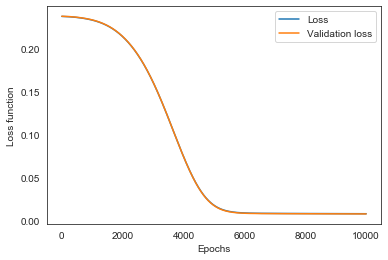

In [43]:
plot_history(autoencoder_5)

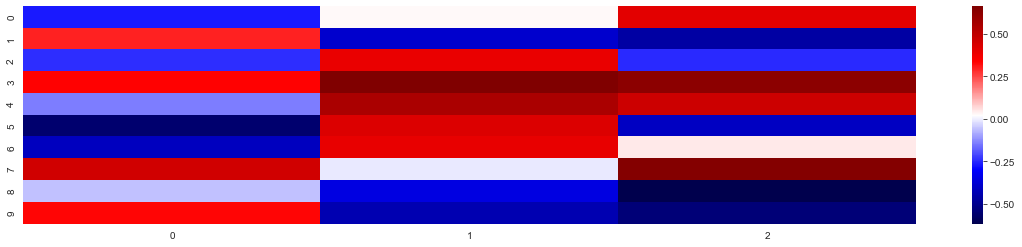

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

#get the weights of the hidden layer
weights=autoencoder_5.layers[5].get_weights()
#visualize the weights
plt.figure(figsize=(20,4))
sns.heatmap(data=weights[0], cmap='seismic')
#plt.gca().set_xticklabels(range(no_dim_features))
plt.show()

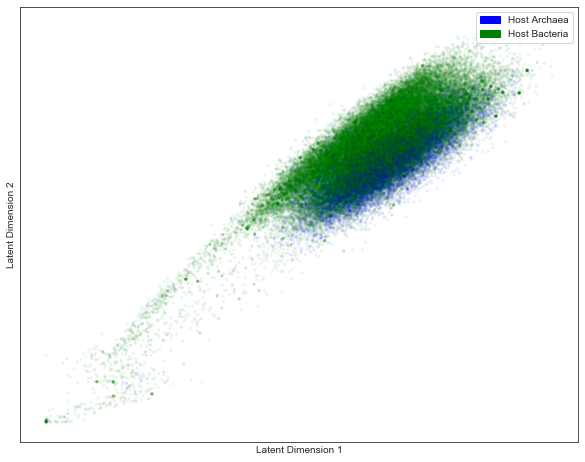

In [45]:
#encoder input into latent dimensions
x_enc_5 = encoder_5.predict(x_train, batch_size=256)
plot_encoded(x_enc_5, y_train)

No handles with labels found to put in legend.


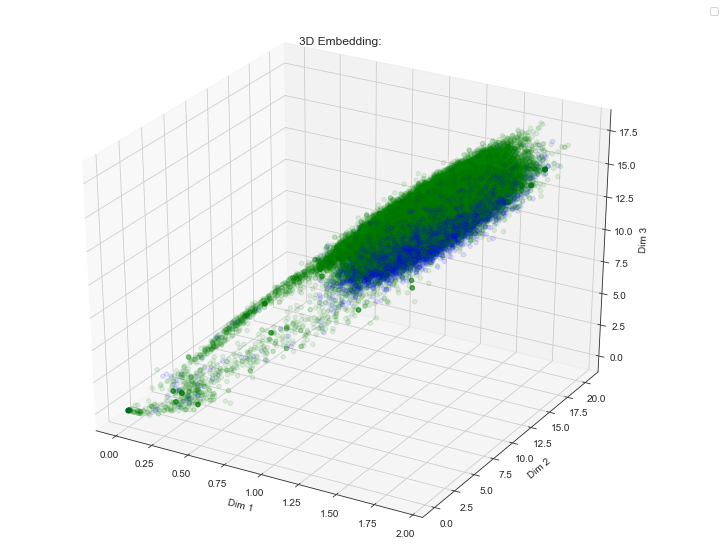

In [46]:
plot_encoded_3D(x_enc_5, y_train_og)

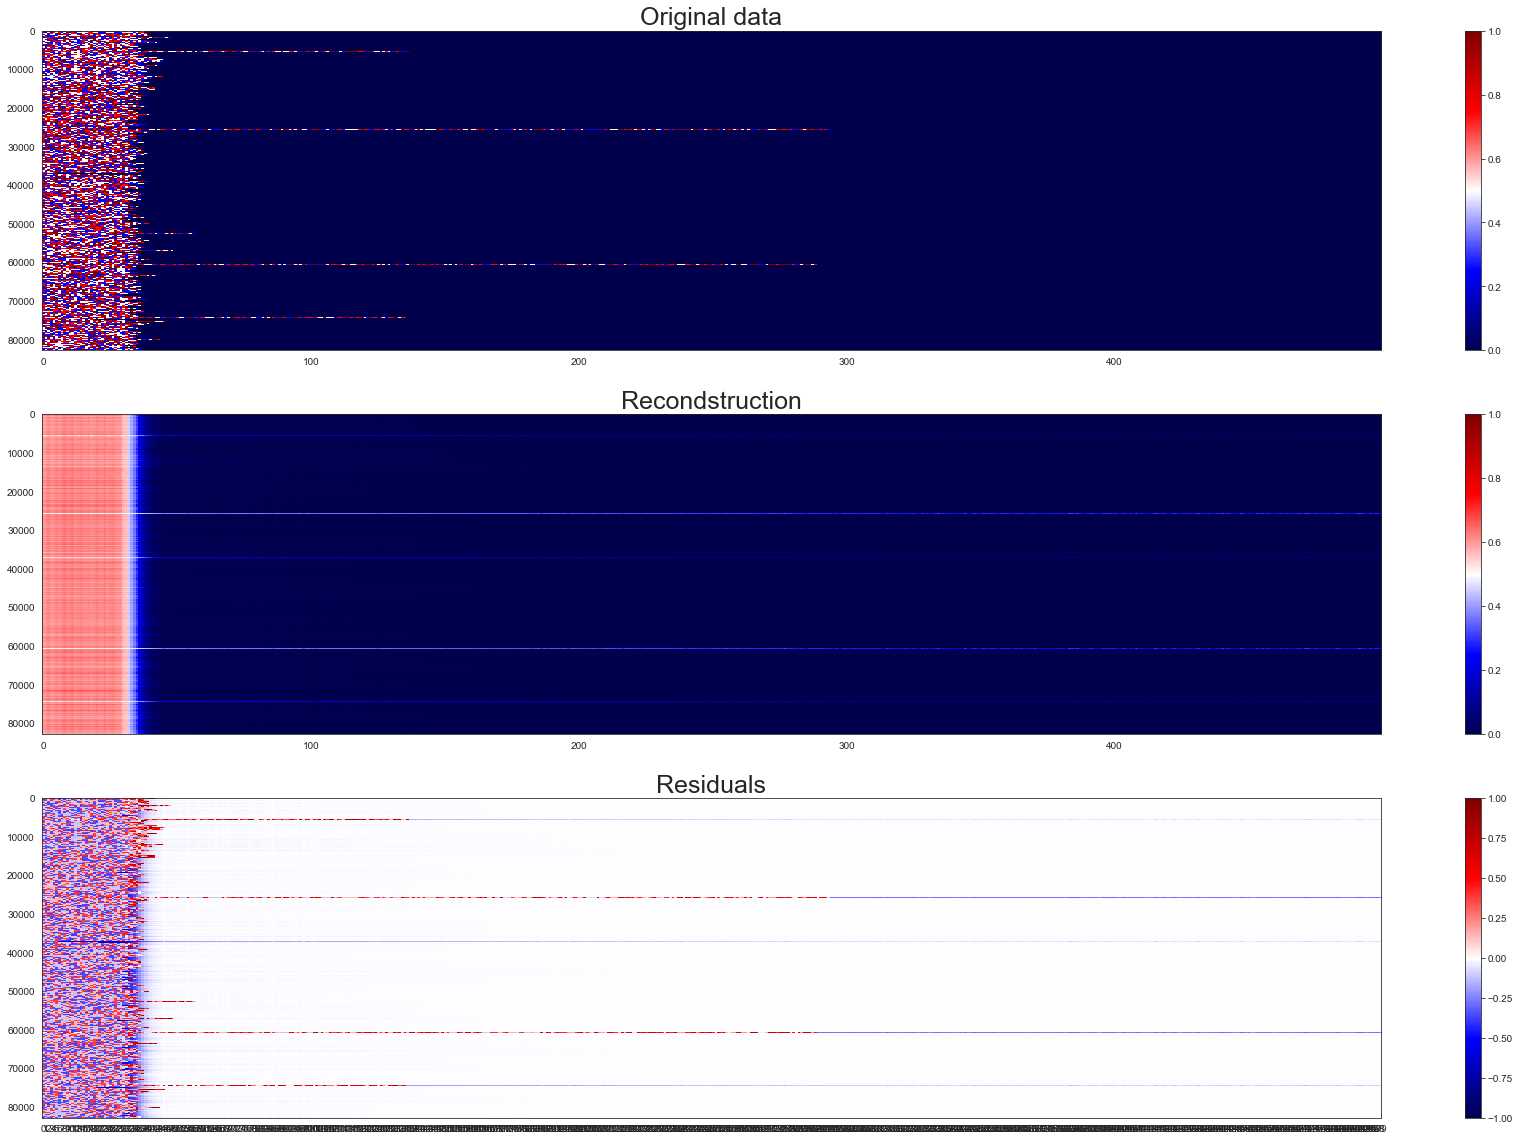

1001411.0720810593


In [47]:
#reconstruct the data
data_dec_5 = autoencoder_5.predict(all_sequence_no_dim_norm)
plot_reconstruction(all_sequence_no_dim_norm, data_dec_5)

In [ ]:
#819786.7417759994, rl: 0.0000001, epochs:10000